In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [45]:
NY311_df = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")
NY311_df.drop("Unnamed: 0", axis =1, inplace=True)
NY311_df.set_index("Unique Key", inplace=True)
NY311_df.sort_index(inplace=True)
NY311_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Unique Key,,,,,,,,,,,,,,
15629728,01/01/2010 12:00:00 AM,01/12/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969
15629899,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630099,01/01/2010 12:00:00 AM,01/01/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192
15630315,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630431,01/01/2010 12:00:00 AM,01/02/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293


In [46]:
print(NY311_df.shape)
print("Number of Complaints:", NY311_df.shape[0])

(6019843, 14)
Number of Complaints: 6019843


In [47]:
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019843 entries, 15629728 to 45532043
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Created Date            object 
 1   Closed Date             object 
 2   Complaint Type          object 
 3   Location Type           object 
 4   Incident Zip            float64
 5   Incident Address        object 
 6   Street Name             object 
 7   Address Type            object 
 8   City                    object 
 9   Status                  object 
 10  Resolution Description  object 
 11  Borough                 object 
 12  Latitude                float64
 13  Longitude               float64
dtypes: float64(3), object(11)
memory usage: 688.9+ MB


In [48]:
NY311_df.columns

Index(['Created Date', 'Closed Date', 'Complaint Type', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Address Type',
       'City', 'Status', 'Resolution Description', 'Borough', 'Latitude',
       'Longitude'],
      dtype='object')

In [49]:
NY311_df["Created Date"] = pd.to_datetime(NY311_df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df["Closed Date"] = pd.to_datetime(NY311_df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019843 entries, 15629728 to 45532043
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Created Date            datetime64[ns]
 1   Closed Date             datetime64[ns]
 2   Complaint Type          object        
 3   Location Type           object        
 4   Incident Zip            float64       
 5   Incident Address        object        
 6   Street Name             object        
 7   Address Type            object        
 8   City                    object        
 9   Status                  object        
 10  Resolution Description  object        
 11  Borough                 object        
 12  Latitude                float64       
 13  Longitude               float64       
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 688.9+ MB


In [50]:
NY311_df

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Unique Key,,,,,,,,,,,,,,
15629728,2010-01-01 00:00:00,2010-01-12,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969
15629899,2010-01-01 00:00:00,2010-01-16,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630099,2010-01-01 00:00:00,2010-01-01,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192
15630315,2010-01-01 00:00:00,2010-01-16,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630431,2010-01-01 00:00:00,2010-01-02,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45532039,2020-02-02 14:09:33,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11235.0,2750 HOMECREST AVENUE,HOMECREST AVENUE,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.584298,-73.956290
45532040,2020-02-02 23:37:42,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11214.0,8301 BAY PARKWAY,BAY PARKWAY,ADDRESS,BROOKLYN,Open,The complaint you filed is a duplicate of a co...,BROOKLYN,40.603561,-73.992117
45532041,2020-02-02 16:15:59,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10031.0,3675 BROADWAY,BROADWAY,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.830944,-73.947166


In [51]:
print("Complaints since: ", NY311_df["Created Date"].min())
print("Complaints till:", NY311_df["Closed Date"].max())

Complaints since:  2010-01-01 00:00:00
Complaints till: 2020-02-02 21:42:28


In [52]:
MIA = NY311_df["Incident Address"].isnull().sum() 
def roundup(MIA):
    return int(np.math.floor(MIA/100.0))*100
print("Approximately", roundup(MIA), "incidents have a missing Incident Address")

Approximately 52800 incidents have a missing Incident Address


In [53]:
house_df1 = pd.read_csv("PLUTO_for_WEB/BX_18v1.csv")
print(house_df1["ZipCode"].nunique(), "Valid ZIP Codes exist in the Bronx PLUTO dataset")

26 Valid ZIP Codes exist in the Bronx PLUTO dataset


In [54]:
house_df2 = pd.read_csv("PLUTO_for_WEB/QN_18v1.csv")
print(house_df2["ZipCode"].nunique(), "Valid ZIP Codes exist in the Queens PLUTO dataset")

65 Valid ZIP Codes exist in the Queens PLUTO dataset


In [56]:
#No. of Complaint Types
print(NY311_df["Complaint Type"].value_counts())
print("There seems to be approximately", NY311_df["Complaint Type"].value_counts().count(), "complaint types")
print("There seems to be approximately", NY311_df["Complaint Type"].value_counts().sum(), "complaints")

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Electric                        1
Mold          

In [57]:
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].str.upper()
NY311_df["Complaint Type"].unique()

array(['HEATING', 'PLUMBING', 'HPD LITERATURE REQUEST', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'ELECTRIC',
       'APPLIANCE', 'PAINT/PLASTER', 'GENERAL', 'STRUCTURAL', 'SAFETY',
       'UNSANITARY CONDITION', 'WATER LEAK', 'DOOR/WINDOW',
       'FLOORING/STAIRS', 'HEAT/HOT WATER', 'OUTSIDE BUILDING',
       'ELEVATOR', 'AGENCY', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [61]:
#Merge duplicate complaint type categories
replace_categories = {"HEAT/HOT WATER" : "HEATING", "CONSTRUCTION": "GENERAL CONSTRUCTION", "PAINT - PLASTER" : "PAINT/PLASTER", "Electric": "ELECTRIC"}

NY311_df["Complaint Type"] = NY311_df["Complaint Type"].replace(replace_categories)
NY311_df["Complaint Type"].unique()

array(['HEATING', 'PLUMBING', 'HPD LITERATURE REQUEST', 'PAINT/PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'ELECTRIC', 'APPLIANCE',
       'GENERAL', 'STRUCTURAL', 'SAFETY', 'UNSANITARY CONDITION',
       'WATER LEAK', 'DOOR/WINDOW', 'FLOORING/STAIRS', 'OUTSIDE BUILDING',
       'ELEVATOR', 'AGENCY', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [71]:
print(NY311_df["Complaint Type"].value_counts())
print("There are exactly", NY311_df["Complaint Type"].value_counts().nunique(), "complaint types")

HEATING                   2149424
PLUMBING                   711141
PAINT/PLASTER              707695
GENERAL CONSTRUCTION       505941
UNSANITARY CONDITION       457142
ELECTRIC                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    152471
FLOORING/STAIRS            137402
APPLIANCE                  112835
HPD LITERATURE REQUEST      52824
SAFETY                      51953
OUTSIDE BUILDING             7148
ELEVATOR                     6725
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                6
MOLD                            1
Name: Complaint Type, dtype: int64
There are exactly 20 complaint types


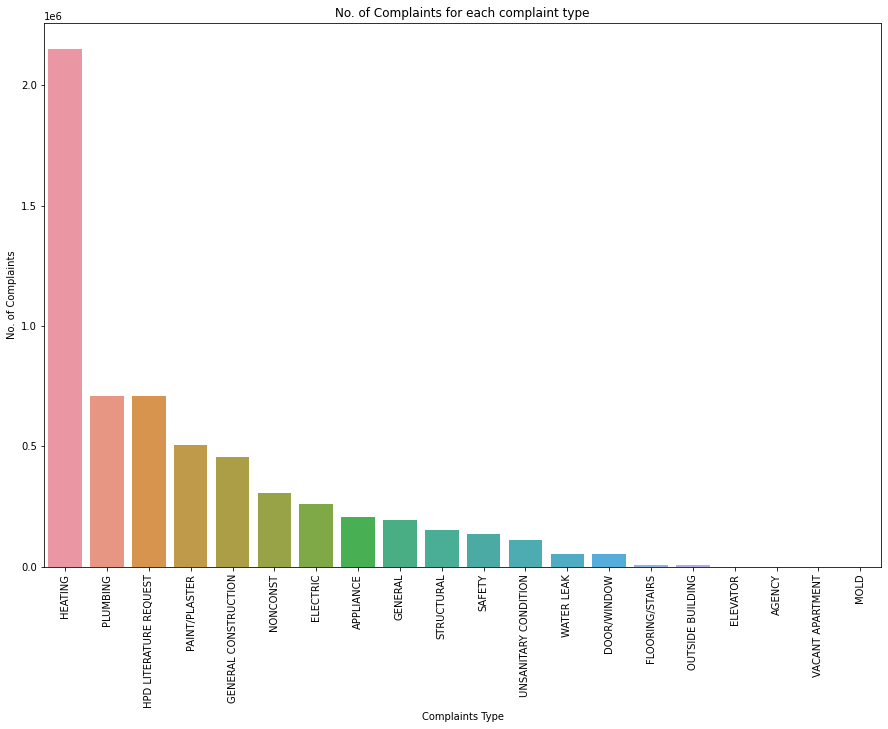

In [60]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=NY311_df["Complaint Type"].unique(), y=NY311_df["Complaint Type"].value_counts())
ax.set(xlabel="Complaints Type", ylabel="No. of Complaints")
ax.set_title("No. of Complaints for each complaint type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [123]:
print(NY311_df["Complaint Type"].value_counts()>800000)
print("\nUsing 800,000 as a threshold, complaint types that we can recommend the Department of Housing Preservation and Development of New York City address first is HEATING")

HEATING                    True
PLUMBING                  False
PAINT/PLASTER             False
GENERAL CONSTRUCTION      False
UNSANITARY CONDITION      False
ELECTRIC                  False
NONCONST                  False
DOOR/WINDOW               False
WATER LEAK                False
GENERAL                   False
FLOORING/STAIRS           False
APPLIANCE                 False
HPD LITERATURE REQUEST    False
SAFETY                    False
OUTSIDE BUILDING          False
ELEVATOR                  False
STRUCTURAL                False
AGENCY                    False
VACANT APARTMENT          False
MOLD                      False
Name: Complaint Type, dtype: bool

Using 800,000 as a threshold, complaint types that we can recommend the Department of Housing Preservation and Development of New York City address first is HEATING
